In [ ]:
from PIL import Image
import pytesseract
from pytesseract import Output
import cv2

# Chemin vers l'image
source = '/home/robot/Pictures/ReceiptSwiss.jpg'

# Chargement de l'image
img = cv2.imread(source)

# Extraction du texte de l'image
text = pytesseract.image_to_string(img)
print(text)

# Extraction des données avec les coordonnées des boîtes de délimitation
d = pytesseract.image_to_data(img, output_type=Output.DICT)

# Nombre de boîtes
NbBox = len(d['level'])
print("Number of boxes: {}".format(NbBox))

# Dessiner les rectangles autour du texte détecté
for i in range(NbBox):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Afficher l'image avec les rectangles
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


CASH RECEIPT

Adress: Lorem ipsum, 010
Tel: +01 001 010 10
Data: 25/12/2019
Lorem 1.21
Ipsum 3.12
Dolor .ae
Sit 48.00
Amet 11.90
Total 66.54
Cash 100.00
Change 33.46

THANK YOU!
A f=]

Number of boxes: 54


In [1]:
from PIL import Image
import pytesseract
from pytesseract import Output
import cv2

# Chemin vers l'image
source = '/home/robot/Pictures/EVIAN.png'

# Chargement de l'image
img = cv2.imread(source)

# Vérification si l'image est chargée
if img is None:
    print("Erreur : L'image n'a pas pu être chargée. Vérifiez le chemin.")
else:
    # Extraction du texte de l'image
    text = pytesseract.image_to_string(img)
    print("Texte extrait :")
    print(text)

    # Enregistrement du texte dans un fichier
    with open('texte_extrait.txt', 'w', encoding='utf-8') as f:
        f.write(text)

    print("Texte sauvegardé dans 'texte_extrait.txt'.")

    # Extraction des données avec les coordonnées des boîtes de délimitation
    d = pytesseract.image_to_data(img, output_type=Output.DICT)

    # Nombre de boîtes
    NbBox = len(d['level'])
    print("Number of boxes: {}".format(NbBox))

    # Dessiner les rectangles autour du texte détecté
    for i in range(NbBox):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Afficher l'image avec les rectangles
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Texte extrait :
 

Texte sauvegardé dans 'texte_extrait.txt'.
Number of boxes: 5


Using CPU. Note: This module is much faster with a GPU.


Texte extrait :
evian 4No NATURAL SprinG WATER Eau DE source NaturelLe 1.5L 
Texte sauvegardé dans 'texte_extrait.txt'.


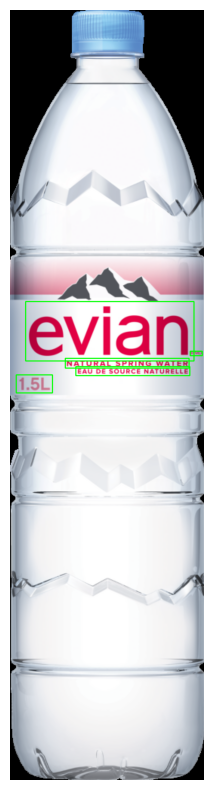

In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Chemin vers l'image
source = '/home/robot/Pictures/EVIAN.png'

# Chargement de l'image
img = cv2.imread(source)

# Vérification si l'image est chargée
if img is None:
    print("Erreur : L'image n'a pas pu être chargée. Vérifiez le chemin.")
else:
    # Redimensionnement de l'image pour une meilleure précision
    scale_percent = 200  # Augmenter la taille de l'image de 200%
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    # Conversion en niveaux de gris
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    # Sauvegarde temporaire de l'image pour EasyOCR
    temp_image_path = "temp_image.png"
    cv2.imwrite(temp_image_path, gray)

    # Initialisation de EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=False)  # Utilisation du GPU si disponible
    result = reader.readtext(temp_image_path)

    # Extraction du texte et affichage
    text = ''
    for (bbox, string, prob) in result:
        text += string + ' '

    print("Texte extrait :")
    print(text)

    # Enregistrement du texte dans un fichier
    with open('texte_extrait.txt', 'w', encoding='utf-8') as f:
        f.write(text)

    print("Texte sauvegardé dans 'texte_extrait.txt'.")

    # Dessiner les rectangles autour du texte détecté
    for (bbox, string, prob) in result:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = (int(top_left[0]), int(top_left[1]))
        bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
        cv2.rectangle(img_resized, top_left, bottom_right, (0, 255, 0), 2)

    # Enregistrer l'image avec les rectangles
    output_image_path = "output_image.png"
    cv2.imwrite(output_image_path, img_resized)
    
    # Afficher l'image dans le notebook
    img_with_boxes = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)  # Conversion en RGB pour matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.show()


In [ ]:
# prochaine etapte ajouter sur lapp et estimer un taux de correct qui signifie aucune erreur dimpression